In [2]:
import pandas as pd
df = pd.read_csv('/content/seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
#First 5 rows of the data

df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
#Checking weather the data is null or not

df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [10]:
#Remove unwanted coloumns
x = df.drop(['date','weather'],axis=1)
y = df['weather']


In [14]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = rfc_model.predict(x_test)
y_pred

array(['sun', 'rain', 'rain', 'drizzle', 'rain', 'rain', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'snow', 'sun',
       'rain', 'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain',
       'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'snow', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun',
       'drizzle', 'sun', 'sun', 'sun', 'rain'

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred))

[[  1   0   0   0   8]
 [  1   2   1   0  21]
 [  0   0 111   2   7]
 [  0   0   6   2   0]
 [  3   3   1   0 124]]
              precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.40      0.08      0.13        25
        rain       0.93      0.93      0.93       120
        snow       0.50      0.25      0.33         8
         sun       0.78      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.56      0.46      0.48       293
weighted avg       0.78      0.82      0.79       293

Accuracy =  0.8191126279863481


In [53]:
import numpy as np
new_data = np.array([[0.0, 12.8, 5.0, 4.7]])  # [precipitation, temp_max, temp_min, wind]
prediction = rfc_model.predict(new_data)
print("Prediction:", prediction)

Prediction: ['drizzle']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
#Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)

GaussianNB()

In [21]:
y_pred = gnb_model.predict(x_test)
y_pred

array(['sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'snow',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'snow', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'snow', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun',
       'drizzle', 'sun', 'sun', 'sun', 'rain', 'rai

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred))

[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.96      0.91      0.94       120
        snow       0.57      0.50      0.53         8
         sun       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.46      0.48      0.47       293
weighted avg       0.75      0.83      0.78       293

Accuracy =  0.8293515358361775


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
import numpy as np
new_data = np.array([[6.0, 15.8, 6.0, 9.7]])  # [precipitation, temp_max, temp_min, wind]
prediction = gnb_model.predict(new_data)
print("Prediction:", prediction)

Prediction: ['rain']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [24]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(criterion = "entropy",random_state = 1)
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [49]:
y_pred = dtc_model.predict(x_test)
y_pred

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred))

[[  0   0   1   0   8]
 [  2   4   2   0  17]
 [  2   0 110   3   5]
 [  0   0   5   3   0]
 [ 14  12   2   0 103]]
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.25      0.16      0.20        25
        rain       0.92      0.92      0.92       120
        snow       0.50      0.38      0.43         8
         sun       0.77      0.79      0.78       131

    accuracy                           0.75       293
   macro avg       0.49      0.45      0.46       293
weighted avg       0.76      0.75      0.75       293

Accuracy =  0.7508532423208191


In [56]:
import numpy as np
new_data = np.array([[1.3,8.9,2.8,6.7]])  # [precipitation, temp_max, temp_min, wind]
prediction = rfc_model.predict(new_data)
print("Prediction:", prediction)

Prediction: ['rain']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = lr_model.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred))


[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 112   0   8]
 [  0   0   7   1   0]
 [  0   0   0   0 131]]
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.94      0.93      0.94       120
        snow       1.00      0.12      0.22         8
         sun       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.54      0.41      0.40       293
weighted avg       0.75      0.83      0.78       293

Accuracy =  0.8327645051194539


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
import numpy as np
new_data = np.array([[0.0, 12.8, 5.0, 4.7]])  # [precipitation, temp_max, temp_min, wind]
prediction = lr_model.predict(new_data)
print("Prediction:", prediction)

Prediction: ['sun']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
#K-Nearest Neighbour Model

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn_model.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred))

[[  1   0   0   0   8]
 [  1   5   3   0  16]
 [  0   1 106   0  13]
 [  0   1   4   0   3]
 [  1   7   7   0 116]]
              precision    recall  f1-score   support

     drizzle       0.33      0.11      0.17         9
         fog       0.36      0.20      0.26        25
        rain       0.88      0.88      0.88       120
        snow       0.00      0.00      0.00         8
         sun       0.74      0.89      0.81       131

    accuracy                           0.78       293
   macro avg       0.46      0.42      0.42       293
weighted avg       0.73      0.78      0.75       293

Accuracy =  0.7781569965870307


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
import numpy as np
new_data = np.array([[2.5, 34, 25, 12]])  # [precipitation, temp_max, temp_min, wind]
prediction = knn_model.predict(new_data)
print("Prediction:", prediction)

Prediction: ['sun']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [33]:
#SVM

from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
y_pred = svc_model.predict(x_test)
y_pred

array(['sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'snow', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'snow', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun',
       'sun', 'sun', 'sun', 'rain', 'rain', 

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred))

[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 111   1   8]
 [  0   0   7   1   0]
 [  0   0   0   0 131]]
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.94      0.93      0.93       120
        snow       0.50      0.12      0.20         8
         sun       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.44      0.41      0.40       293
weighted avg       0.74      0.83      0.77       293

Accuracy =  0.8293515358361775


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
#prediction in SVM model
import numpy as np
new_data = np.array([[4.0, 25, 17, 2.0]])  # [precipitation, temp_max, temp_min, wind]
prediction = svc_model.predict(new_data)
print("Prediction:", prediction)

Prediction: ['rain']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


/tmp/ipython-input-60-2082131860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index, palette='Set2')


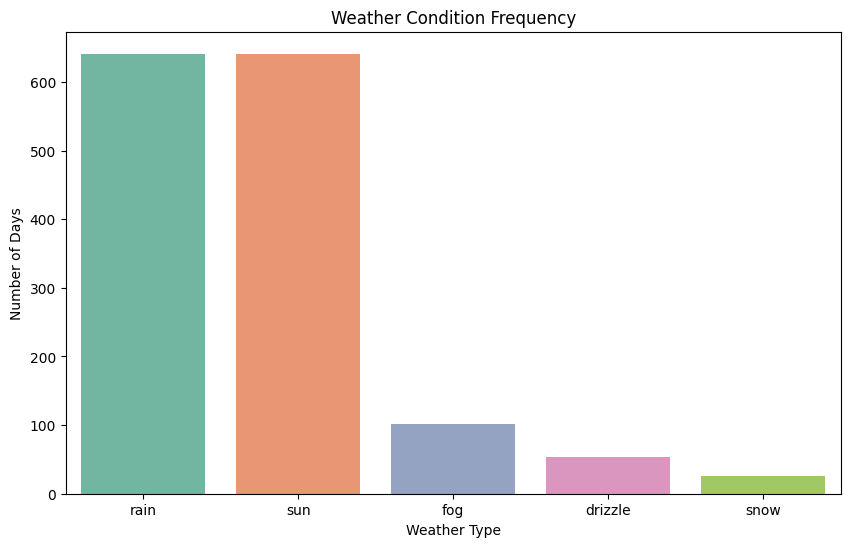

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/seattle-weather.csv')

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index, palette='Set2')
plt.title('Weather Condition Frequency')
plt.xlabel('Weather Type')
plt.ylabel('Number of Days')
plt.show()


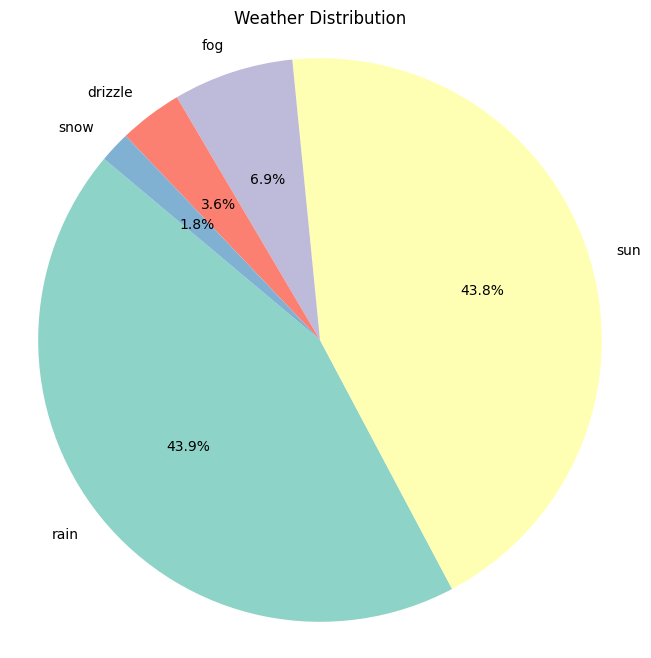

In [61]:
weather_counts = df['weather'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Weather Distribution')
plt.axis('equal')
plt.show()


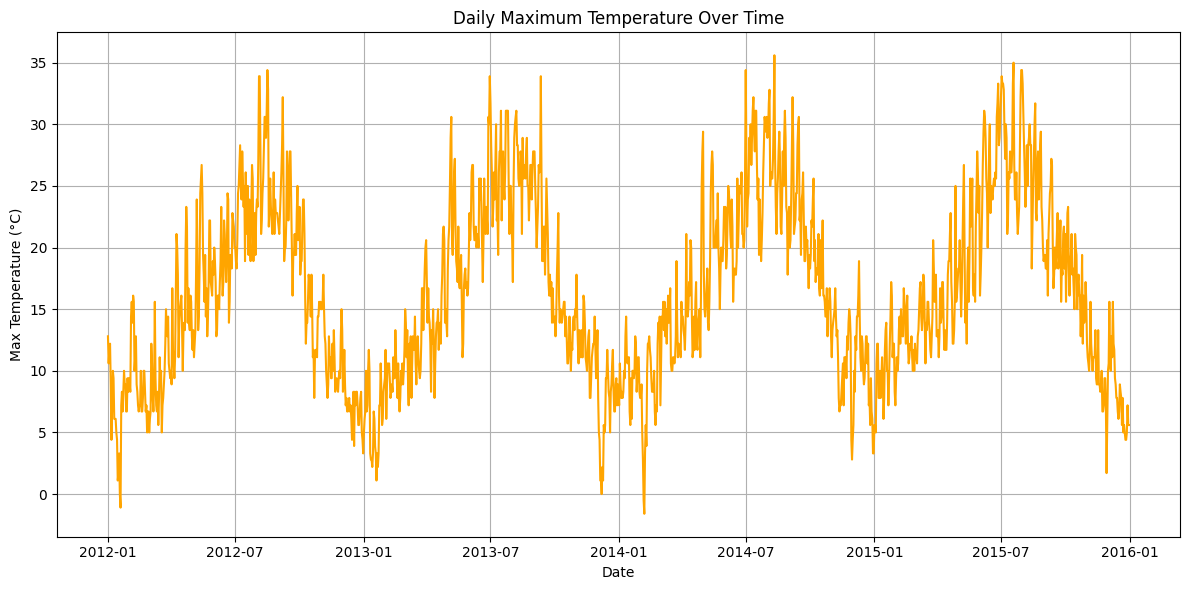

In [62]:
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values(by='date')

plt.figure(figsize=(12,6))
plt.plot(df_sorted['date'], df_sorted['temp_max'], color='orange')
plt.title('Daily Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-71-2274079098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather', y='temp_max', palette='pastel')


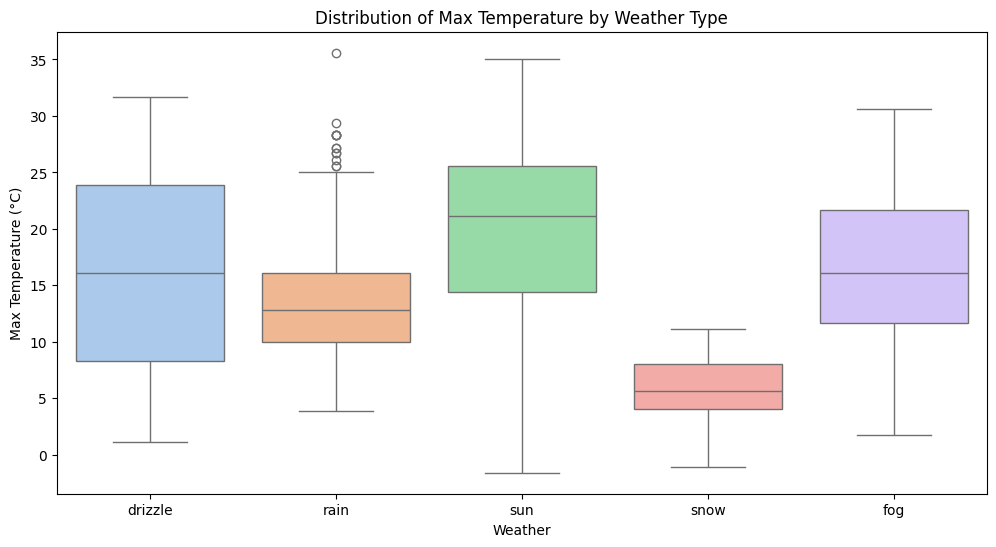

In [71]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='weather', y='temp_max', palette='pastel')
plt.title('Distribution of Max Temperature by Weather Type')
plt.xlabel('Weather')
plt.ylabel('Max Temperature (°C)')
plt.show()


/tmp/ipython-input-67-3650359864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='weather', y='wind', estimator='mean', palette='coolwarm')


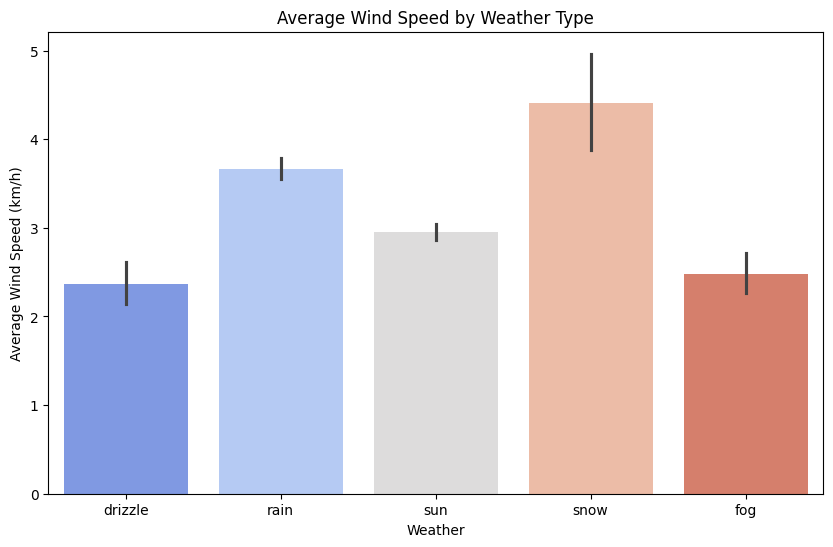

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='weather', y='wind', estimator='mean', palette='coolwarm')
plt.title('Average Wind Speed by Weather Type')
plt.xlabel('Weather')
plt.ylabel('Average Wind Speed (km/h)')
plt.show()

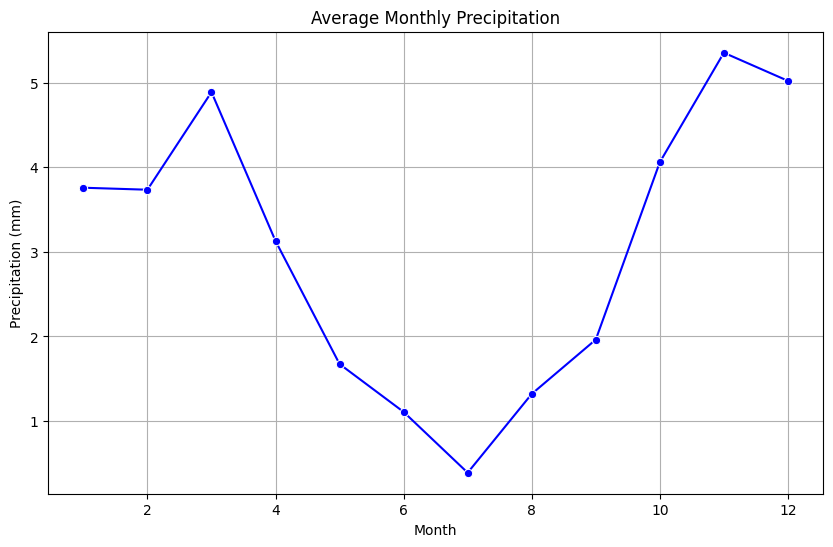

In [74]:
df['month'] = df['date'].dt.month

monthly_precip = df.groupby('month')['precipitation'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_precip.index, y=monthly_precip.values, marker='o', color='blue')
plt.title('Average Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()
